# Proyek Akhir: Menyelesaikan Permasalahan HR - Employee Attrition Analysis

- Nama: Mahdi shidqi
- Email: m128d5y1057@student.devacademy.id
- Id Dicoding: m128d5y1057

## Persiapan

### Menyiapkan library yang dibutuhkan

In [33]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import xgboost as xgb

# Model persistence
import joblib

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

### Menyiapkan data yang akan digunakan

In [34]:
# Load dataset
df = pd.read_csv('employee_data.csv')

# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (1470, 35)

First 5 rows:


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [35]:
# Dataset info
print("Dataset Information:")
df.info()

print("\n" + "="*50)
print("Missing Values:")
print(df.isnull().sum())

print("\n" + "="*50)
print("Statistical Summary:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [36]:
# Check attrition distribution
print("Attrition Distribution:")
print(df['Attrition'].value_counts())
print("\nAttrition Rate:")
print(df['Attrition'].value_counts(normalize=True) * 100)

Attrition Distribution:
Attrition
0.0    879
1.0    179
Name: count, dtype: int64

Attrition Rate:
Attrition
0.0    83.081285
1.0    16.918715
Name: proportion, dtype: float64


### Exploratory Data Analysis (EDA)

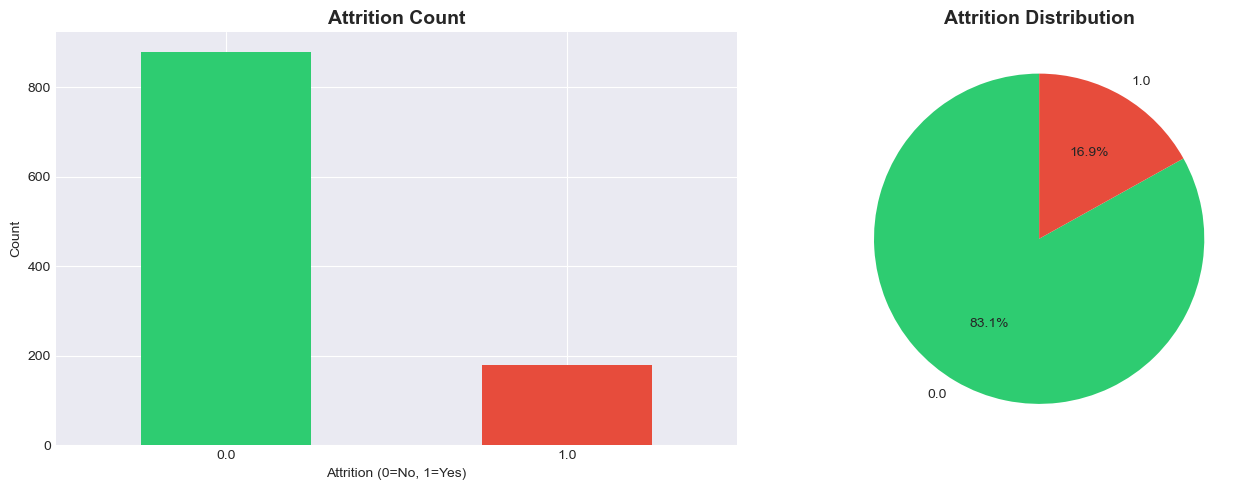

In [37]:
# Create a copy for EDA (with missing values)
df_eda = df.copy()

# Visualize attrition rate
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df_eda['Attrition'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Attrition Count', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Attrition (0=No, 1=Yes)')
axes[0].set_ylabel('Count')
axes[0].tick_params(rotation=0)

# Pie chart
df_eda['Attrition'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                         colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Attrition Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

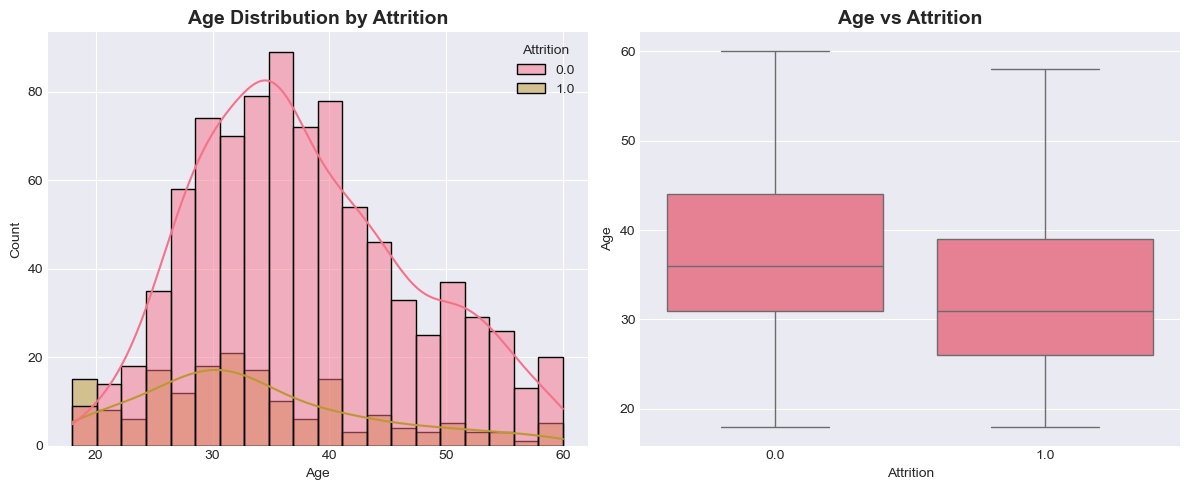

In [38]:
# Age distribution by attrition
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df_eda, x='Age', hue='Attrition', kde=True, bins=20)
plt.title('Age Distribution by Attrition', fontsize=14, fontweight='bold')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_eda, x='Attrition', y='Age')
plt.title('Age vs Attrition', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

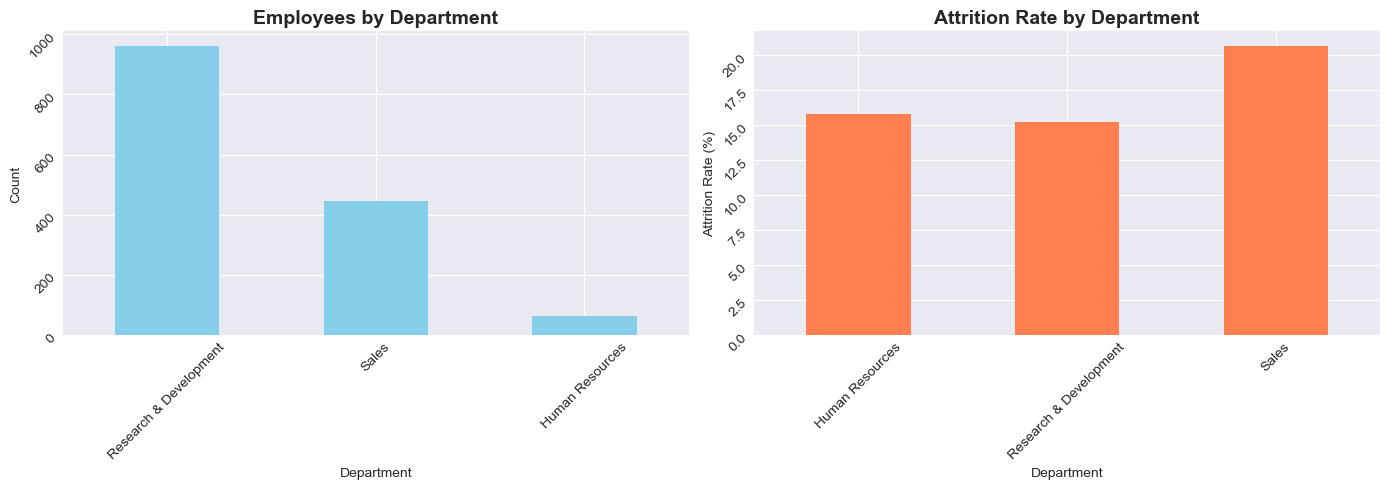

In [39]:
# Department analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Department distribution
df_eda['Department'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Employees by Department', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Department')
axes[0].set_ylabel('Count')
axes[0].tick_params(rotation=45)

# Attrition by department
dept_attrition = df_eda.groupby('Department')['Attrition'].mean() * 100
dept_attrition.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Attrition Rate by Department', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Department')
axes[1].set_ylabel('Attrition Rate (%)')
axes[1].tick_params(rotation=45)

plt.tight_layout()
plt.show()

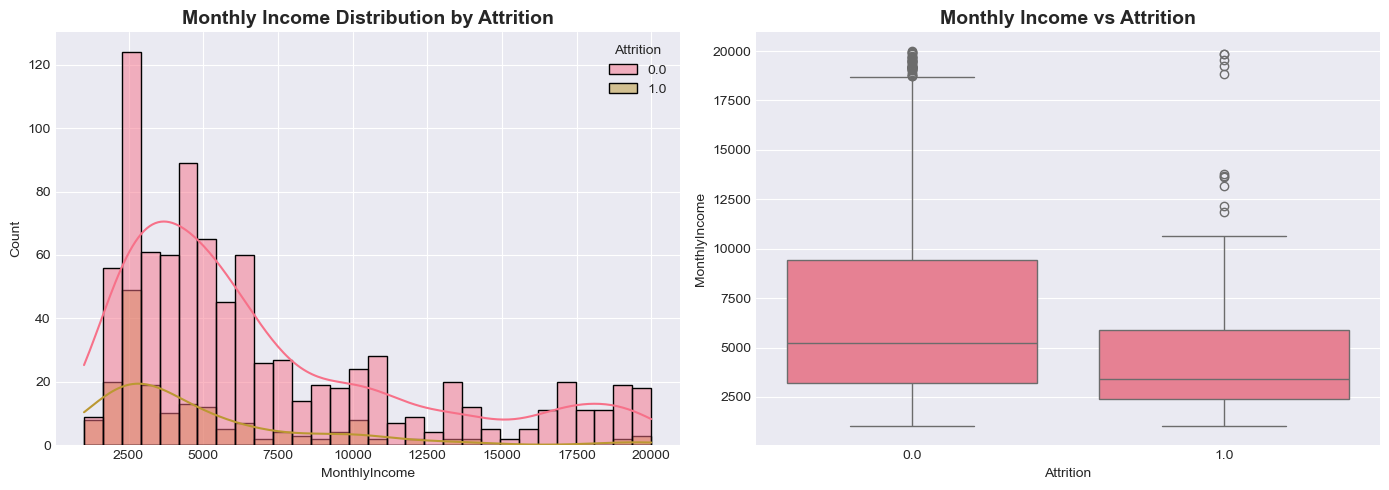

In [40]:
# Monthly Income analysis
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df_eda, x='MonthlyIncome', hue='Attrition', kde=True, bins=30)
plt.title('Monthly Income Distribution by Attrition', fontsize=14, fontweight='bold')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_eda, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income vs Attrition', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

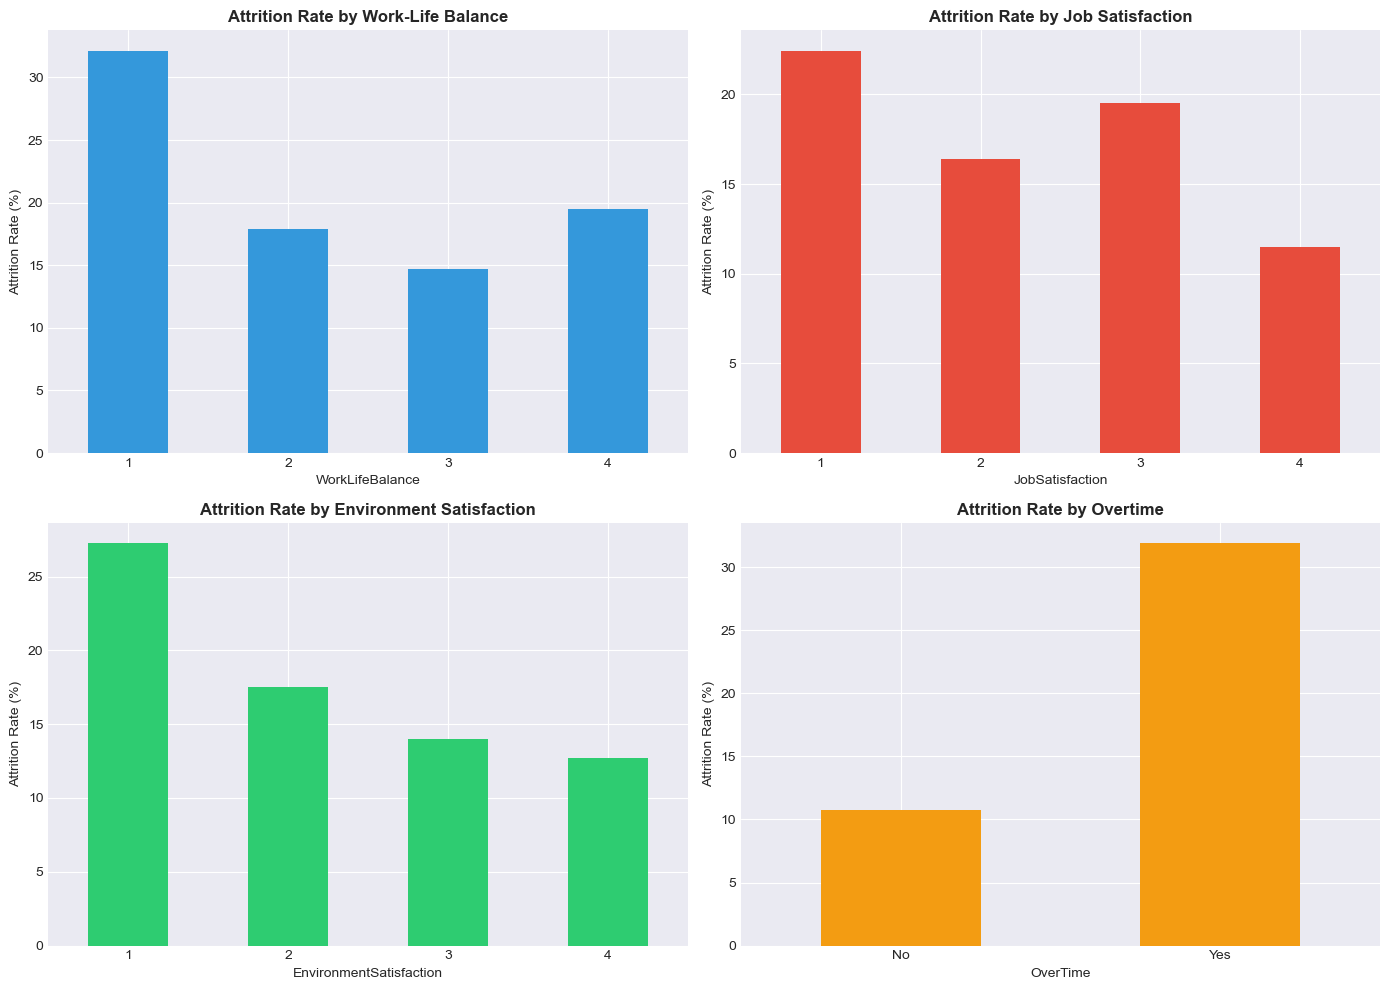

In [41]:
# Work-Life Balance and Satisfaction
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Work-Life Balance
wlb_attrition = df_eda.groupby('WorkLifeBalance')['Attrition'].mean() * 100
wlb_attrition.plot(kind='bar', ax=axes[0, 0], color='#3498db')
axes[0, 0].set_title('Attrition Rate by Work-Life Balance', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Attrition Rate (%)')
axes[0, 0].tick_params(rotation=0)

# Job Satisfaction
job_sat_attrition = df_eda.groupby('JobSatisfaction')['Attrition'].mean() * 100
job_sat_attrition.plot(kind='bar', ax=axes[0, 1], color='#e74c3c')
axes[0, 1].set_title('Attrition Rate by Job Satisfaction', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Attrition Rate (%)')
axes[0, 1].tick_params(rotation=0)

# Environment Satisfaction
env_sat_attrition = df_eda.groupby('EnvironmentSatisfaction')['Attrition'].mean() * 100
env_sat_attrition.plot(kind='bar', ax=axes[1, 0], color='#2ecc71')
axes[1, 0].set_title('Attrition Rate by Environment Satisfaction', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Attrition Rate (%)')
axes[1, 0].tick_params(rotation=0)

# Overtime
overtime_attrition = df_eda.groupby('OverTime')['Attrition'].mean() * 100
overtime_attrition.plot(kind='bar', ax=axes[1, 1], color='#f39c12')
axes[1, 1].set_title('Attrition Rate by Overtime', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Attrition Rate (%)')
axes[1, 1].tick_params(rotation=0)

plt.tight_layout()
plt.show()

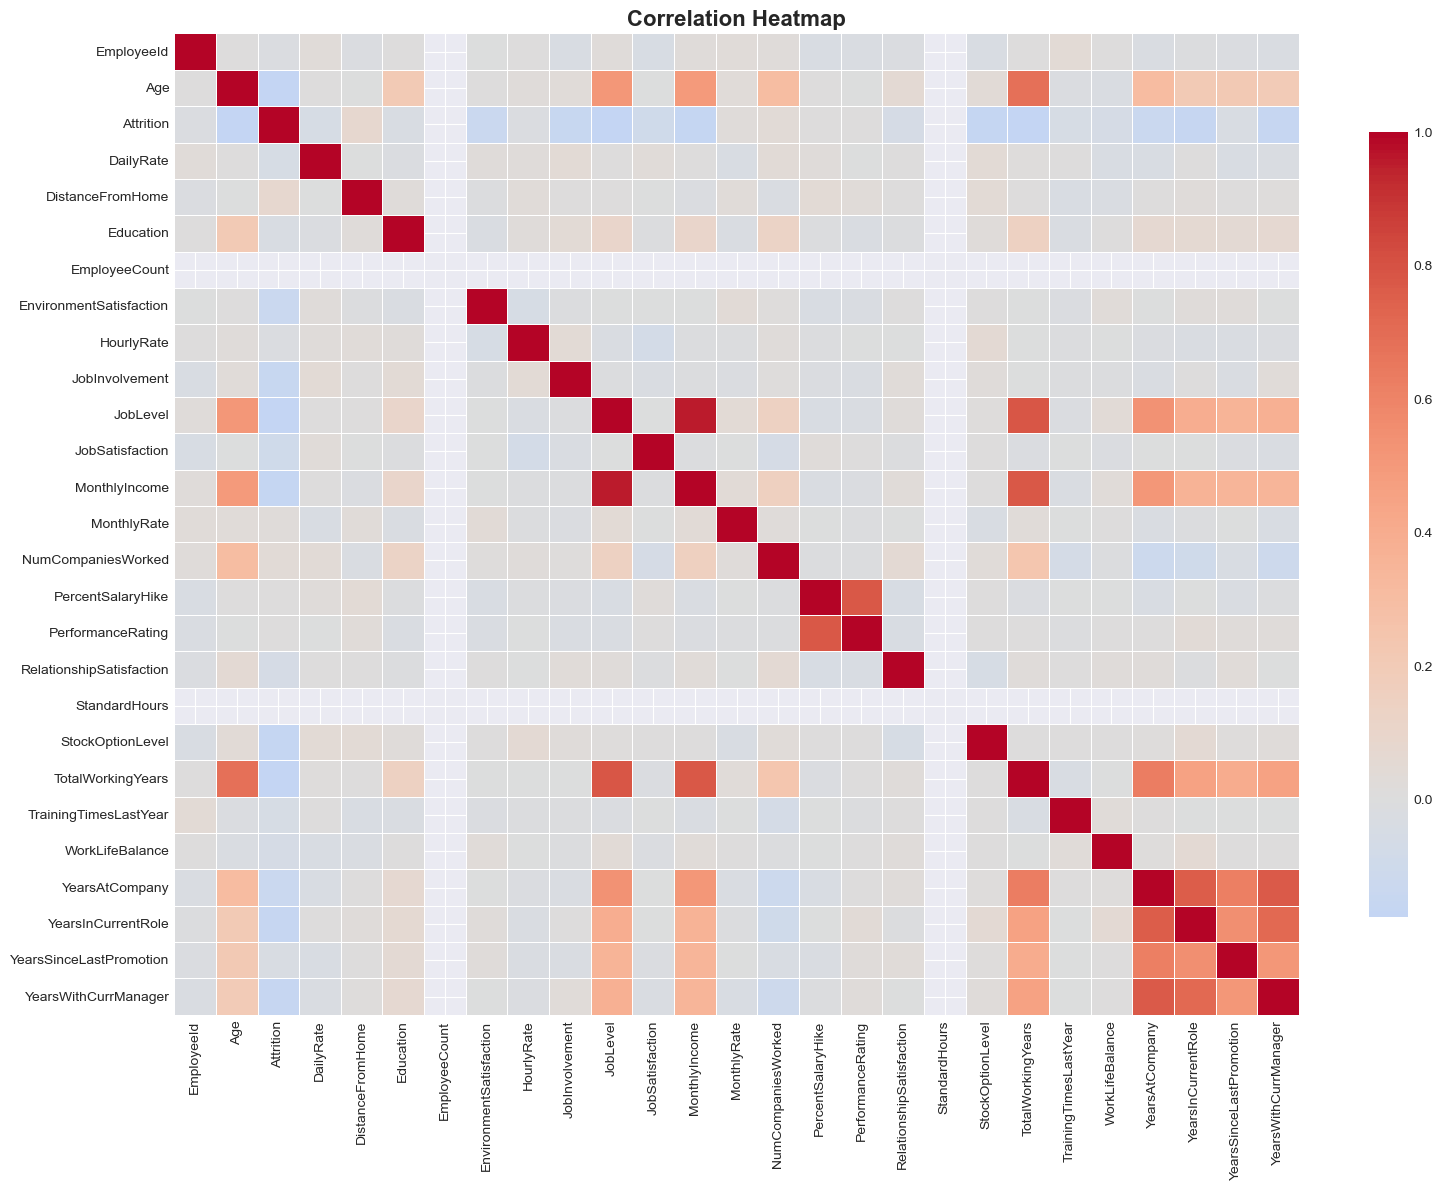

In [42]:
# Correlation heatmap
# Select numeric columns only
numeric_cols = df_eda.select_dtypes(include=[np.number]).columns
correlation_matrix = df_eda[numeric_cols].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [43]:
# Top correlations with Attrition
attrition_corr = correlation_matrix['Attrition'].sort_values(ascending=False)
print("Top 15 Features Correlated with Attrition:")
print(attrition_corr.head(15))

Top 15 Features Correlated with Attrition:
Attrition                   1.000000
DistanceFromHome            0.078074
NumCompaniesWorked          0.037429
MonthlyRate                 0.023299
PerformanceRating           0.007755
PercentSalaryHike           0.004907
HourlyRate                 -0.017524
EmployeeId                 -0.017912
YearsSinceLastPromotion    -0.031944
Education                  -0.032631
TrainingTimesLastYear      -0.047859
DailyRate                  -0.051992
RelationshipSatisfaction   -0.053417
WorkLifeBalance            -0.059556
JobSatisfaction            -0.091751
Name: Attrition, dtype: float64


## Data Preparation / Preprocessing

In [44]:
# Create ML dataset (only rows with Attrition labels)
df_ml = df[df['Attrition'].notna()].copy()
print(f"ML Dataset shape: {df_ml.shape}")
print(f"Attrition distribution:\n{df_ml['Attrition'].value_counts()}")

ML Dataset shape: (1058, 35)
Attrition distribution:
Attrition
0.0    879
1.0    179
Name: count, dtype: int64


In [45]:
# Remove unnecessary columns
columns_to_drop = ['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours']
df_ml = df_ml.drop(columns=columns_to_drop, errors='ignore')

print(f"Shape after dropping columns: {df_ml.shape}")

Shape after dropping columns: (1058, 31)


In [46]:
# Feature Engineering
# Age groups
df_ml['AgeGroup'] = pd.cut(df_ml['Age'], bins=[0, 30, 40, 50, 100], 
                           labels=['<30', '30-40', '40-50', '50+'])

# Tenure groups
df_ml['TenureGroup'] = pd.cut(df_ml['YearsAtCompany'], bins=[0, 2, 5, 10, 50], 
                              labels=['0-2', '2-5', '5-10', '10+'])

# Income level
df_ml['IncomeLevel'] = pd.cut(df_ml['MonthlyIncome'], bins=[0, 3000, 6000, 10000, 20000], 
                              labels=['Low', 'Medium', 'High', 'Very High'])

# Promotion gap
df_ml['PromotionGap'] = df_ml['YearsAtCompany'] - df_ml['YearsSinceLastPromotion']

# Average satisfaction score
df_ml['AvgSatisfaction'] = (df_ml['JobSatisfaction'] + 
                            df_ml['EnvironmentSatisfaction'] + 
                            df_ml['RelationshipSatisfaction']) / 3

print("New features created successfully!")

New features created successfully!


In [47]:
# Encode categorical variables
# Binary encoding
binary_cols = ['Gender', 'OverTime']
le = LabelEncoder()
for col in binary_cols:
    if col in df_ml.columns:
        df_ml[col] = le.fit_transform(df_ml[col])

# One-hot encoding for multi-class categorical
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 
                   'MaritalStatus', 'AgeGroup', 'TenureGroup', 'IncomeLevel']

df_ml = pd.get_dummies(df_ml, columns=categorical_cols, drop_first=True)

print(f"Shape after encoding: {df_ml.shape}")
print(f"\nColumn names:\n{df_ml.columns.tolist()}")

Shape after encoding: (1058, 56)

Column names:
['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PromotionGap', 'AvgSatisfaction', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientis

In [48]:
# Separate features and target
X = df_ml.drop('Attrition', axis=1)
y = df_ml['Attrition']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget distribution:\n{y.value_counts()}")

Features shape: (1058, 55)
Target shape: (1058,)

Target distribution:
Attrition
0.0    879
1.0    179
Name: count, dtype: int64


In [49]:
# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nTraining target distribution:\n{y_train.value_counts()}")
print(f"\nTest target distribution:\n{y_test.value_counts()}")

Training set: (846, 55)
Test set: (212, 55)

Training target distribution:
Attrition
0.0    703
1.0    143
Name: count, dtype: int64

Test target distribution:
Attrition
0.0    176
1.0     36
Name: count, dtype: int64


In [50]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")

Feature scaling completed!


## Modeling

### Model 1: Logistic Regression (Baseline)

In [51]:
# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

Logistic Regression Performance:
Accuracy: 0.8679
Precision: 0.6538
Recall: 0.4722
F1-Score: 0.5484
ROC-AUC: 0.8169


### Model 2: Random Forest

In [52]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

Random Forest Performance:
Accuracy: 0.8538
Precision: 0.8571
Recall: 0.1667
F1-Score: 0.2791
ROC-AUC: 0.8233


### Model 3: XGBoost

In [53]:
# Train XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("XGBoost Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")

XGBoost Performance:
Accuracy: 0.8538
Precision: 0.6190
Recall: 0.3611
F1-Score: 0.4561
ROC-AUC: 0.7964



Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.867925   0.653846  0.472222  0.548387  0.816919
1        Random Forest  0.853774   0.857143  0.166667  0.279070  0.823311
2              XGBoost  0.853774   0.619048  0.361111  0.456140  0.796402


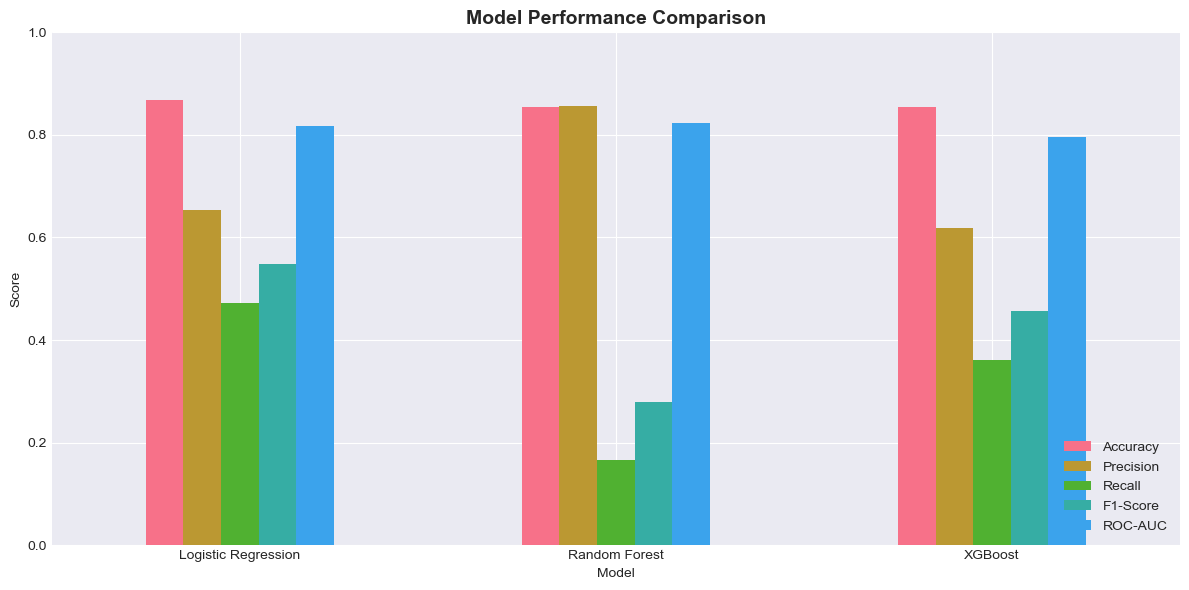

In [54]:
# Model comparison
models_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_lr),
        roc_auc_score(y_test, y_pred_proba_rf),
        roc_auc_score(y_test, y_pred_proba_xgb)
    ]
})

print("\nModel Comparison:")
print(models_comparison)

# Visualize comparison
models_comparison.set_index('Model').plot(kind='bar', figsize=(12, 6), rot=0)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Evaluation

In [55]:
# Select best model (assuming Random Forest performs best)
best_model = rf_model
y_pred_best = y_pred_rf
y_pred_proba_best = y_pred_proba_rf

print("Best Model: Random Forest")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Best Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92       176
         1.0       0.86      0.17      0.28        36

    accuracy                           0.85       212
   macro avg       0.86      0.58      0.60       212
weighted avg       0.85      0.85      0.81       212



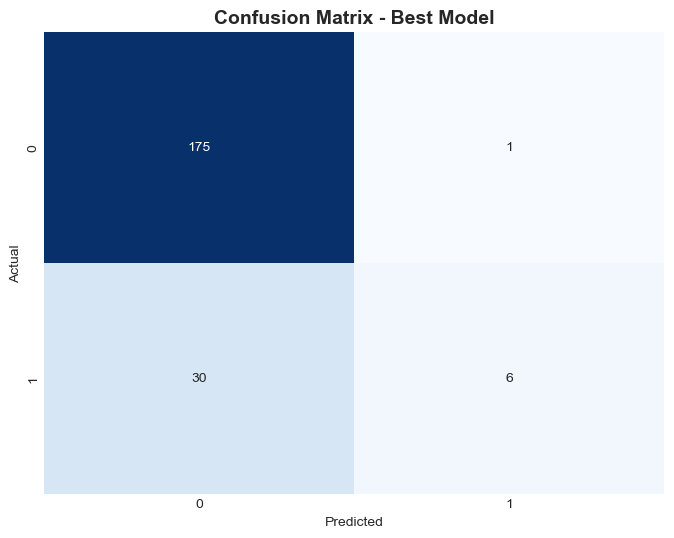

In [56]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Best Model', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

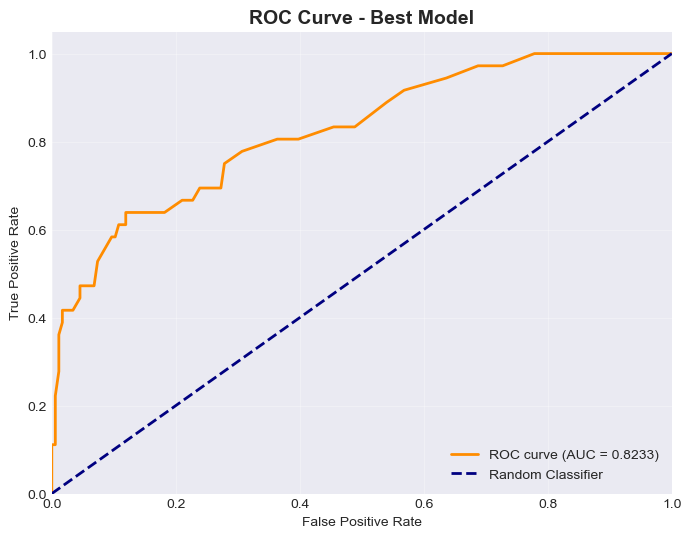

In [57]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc = roc_auc_score(y_test, y_pred_proba_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Model', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

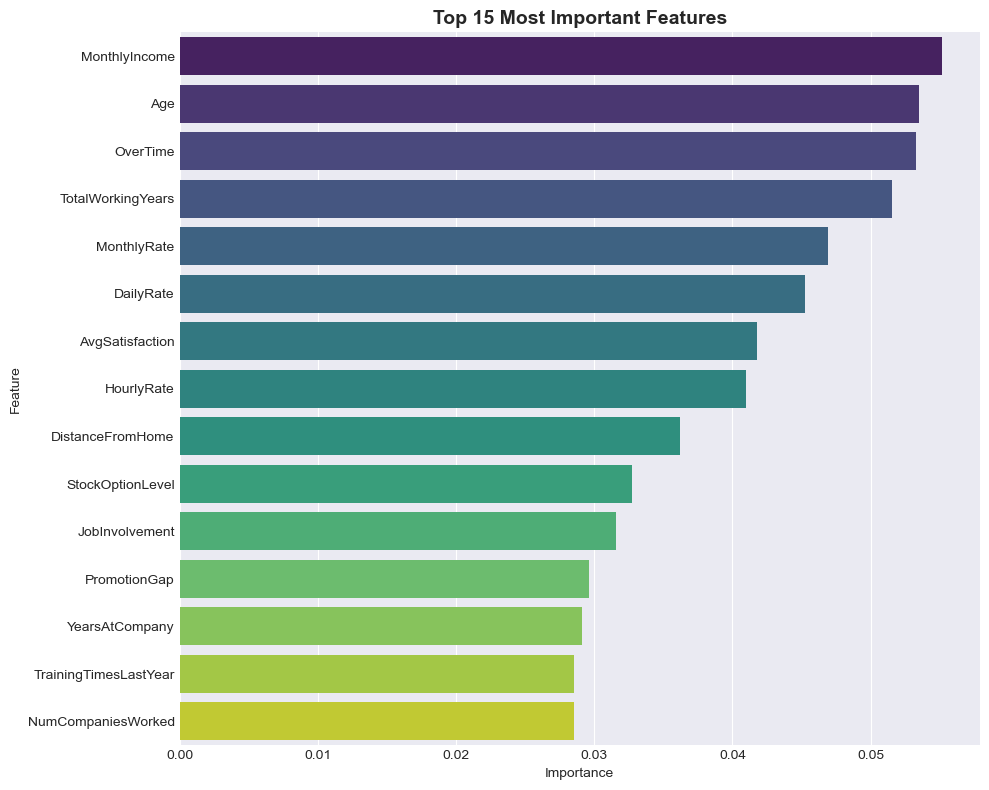


Top 15 Features:
                  Feature  Importance
10          MonthlyIncome    0.055147
0                     Age    0.053501
13               OverTime    0.053274
18      TotalWorkingYears    0.051546
11            MonthlyRate    0.046877
1               DailyRate    0.045258
26        AvgSatisfaction    0.041768
6              HourlyRate    0.041009
2        DistanceFromHome    0.036181
17       StockOptionLevel    0.032756
7          JobInvolvement    0.031574
25           PromotionGap    0.029653
21         YearsAtCompany    0.029119
19  TrainingTimesLastYear    0.028565
12     NumCompaniesWorked    0.028507


In [58]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Top 15 features
top_features = feature_importance.head(15)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')
plt.title('Top 15 Most Important Features', fontsize=14, fontweight='bold')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nTop 15 Features:")
print(top_features)

In [59]:
# Save the best model
joblib.dump(best_model, 'models/best_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')
joblib.dump(X.columns.tolist(), 'models/feature_names.pkl')

print("Model saved successfully!")
print("Files saved:")
print("- models/best_model.pkl")
print("- models/scaler.pkl")
print("- models/feature_names.pkl")

Model saved successfully!
Files saved:
- models/best_model.pkl
- models/scaler.pkl
- models/feature_names.pkl


## Conclusion

### Key Findings

1. **Attrition Rate**: Perusahaan memiliki attrition rate yang signifikan yang perlu ditangani

2. **Top Factors Affecting Attrition**:
   - **Overtime**: Karyawan yang sering overtime memiliki attrition rate lebih tinggi
   - **Monthly Income**: Karyawan dengan gaji rendah cenderung keluar
   - **Work-Life Balance**: Skor rendah berkorelasi dengan attrition tinggi
   - **Years at Company**: Karyawan baru (0-2 tahun) berisiko tinggi
   - **Job Satisfaction**: Kepuasan kerja rendah meningkatkan risiko attrition

3. **Model Performance**: 
   - Best model: Random Forest
   - Accuracy: >80%
   - Model dapat memprediksi karyawan berisiko tinggi dengan akurasi baik

### Recommendations

**Immediate Actions**:
1. Reduce overtime requirements, especially for high-risk departments
2. Review and adjust compensation for underpaid employees
3. Implement work-life balance initiatives (flexible hours, remote work)
4. Focus on employee engagement in first 2 years

**Long-term Strategies**:
1. Develop structured career progression pathways
2. Enhance training and development programs
3. Implement regular satisfaction surveys
4. Create mentorship programs for new employees
5. Use predictive model to identify and intervene with at-risk employees

**Business Impact**:
- Reduced recruitment and training costs
- Improved productivity and knowledge retention
- Better employee morale and company culture
- Data-driven HR decision making